<a href="https://colab.research.google.com/github/booorayan/fin_wk_2_proj/blob/master/fin_inclusion_dsproject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting If Individuals Are Likely To Have A Bank Account Or Not Using A ML Model 

## Defining the Question

### Research Problem

Determine whether an individual is likely to have a bank account or not in order to gauge state of financial inclusion in a given region.

### Context

By predicting individuals likely to have a bank account, we will be able to determine persons with access to financial services in East Africa and consequently, gauge the state of financial inclusion in this region. 

### Metrics for Success



1.   A machine learning model that predicts with an accuracy > 85%
  



### Experimental Design

This project followed the CRISP-DM methodology. the CRISP-DM methodology entails the following steps:


1.   Problem Understanding
2.   Data Understanding
3.   Data Preparation 
4.   Modelling
5.   Evaluation



### Appropriateness of Dataset

The dataset provided contains relevant features/variables such as type of job, level of education, has a bank account, type of location etc., all of which can be used as either features or labels to develop a ML model that predicts whether a person has a bank account or not.

## Importing libraries to be used

In [0]:
# pandas allows us to organize data in table form
import pandas as pd

# nummpy will enable us to work with multidimensional arrays
import numpy as np

# matplotlib will help in visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline  

# seaborn will also help in data visualization
import seaborn as sns
sns.set()  #(Re)set the seaborn default

# pandas profiling provides a summary report, including descriptive statistics of the dataset 
import pandas_profiling as pp

# label encoder converts labels/categorical variables to numerical values

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score

import statsmodels.api as sm

# train_test_split from sklearn enables us to split our dataframe into training and test sets
from sklearn.model_selection import train_test_split

# sklearn's standardscaler enables one to normalize features in a dataframe to be trained 
from sklearn.preprocessing import StandardScaler

# pca is one of the existing approaches for dimensionality reduction
from sklearn.decomposition import PCA

# randomforest classifier is ML model that predicts by classifying data into leaf nodes
from sklearn.ensemble import RandomForestClassifier

# LDA is another approach for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# confusion_matrix and accuracy_score help in evaluating the performance of model created
from sklearn.metrics import confusion_matrix, accuracy_score

## Loading and previewing the dataset

In [72]:
# loading the dataset and previewing the first 5 observations
url = 'http://bit.ly/FinancialDataset'

finance = pd.read_csv(url)
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [73]:
# checking the size of the dataset
finance.shape

# output indicates that dataframe has 23,524 rows and 13 columns

(23524, 13)

In [74]:
# previewing the columns in the dataset

finance.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [75]:
# checking the datatypes of the columns in the dataframe

finance.info()

# only 3 columns are numerical while 10 columns are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## Tidying the Dataset/Data Cleaning

In [76]:
# creating a copy of the dataset named fin to work on using copy() and maintaining the original copy 

fin = finance.copy()
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [77]:
# replacing whitespaces in column names with underscores and converting all column names to lowercase to ensure uniformity

fin.columns = fin.columns.str.replace(' ', '_').str.lower()
fin.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [78]:
# renaming some column names to make them shorter and more descriptive 

fin.rename(columns={'the_relathip_with_head': 'rltshp_with_head', 'type_of_job':'job_type', 'level_of_educuation': 'education_level', 'has_a_bank_account':'has_bank_account', 'type_of_location':'location', 'cell_phone_access': 'cellphone_access'}, inplace=True)
fin.columns

Index(['country', 'year', 'uniqueid', 'has_bank_account', 'location',
       'cellphone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'rltshp_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [79]:
# checking for the sum of duplicate values in the dataset

fin.duplicated().sum()

# output indicates we don't have duplicate values in the dataset


0

In [80]:
# checking for the sum of missing values in each column
fin.isnull().sum()

country                 14
year                     0
uniqueid                 0
has_bank_account        36
location                15
cellphone_access        11
household_size          28
respondent_age          34
gender_of_respondent    34
rltshp_with_head         4
marital_status          32
education_level         29
job_type                30
dtype: int64

In [81]:
# checking total sum of missing values
fin.isnull().sum().sum()

# dataset has a total of 267 missing values

267

In [82]:
# checking the percentage of missing values in dataset

tot_obs = len(fin.index) * len(fin.columns)

pcnt_missing_values = (fin.isnull().sum().sum()/tot_obs) * 100

pcnt_missing_values

# missing values account for a negligible percent (approx 0.09%) of the total observations in the dataset

0.08730854250323727

In [83]:
# Dropping missing values from dataframe (because % of missing values < 5%) using the dropna() method
# and confirming if the missing values have been dropped
fin.dropna(inplace=True)
fin.isnull().sum()

# columns no longer have missing values

country                 0
year                    0
uniqueid                0
has_bank_account        0
location                0
cellphone_access        0
household_size          0
respondent_age          0
gender_of_respondent    0
rltshp_with_head        0
marital_status          0
education_level         0
job_type                0
dtype: int64

In [84]:
# checking the number of observations in each column after dropping null values
fin.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
country                 23343 non-null object
year                    23343 non-null int64
uniqueid                23343 non-null object
has_bank_account        23343 non-null object
location                23343 non-null object
cellphone_access        23343 non-null object
household_size          23343 non-null float64
respondent_age          23343 non-null float64
gender_of_respondent    23343 non-null object
rltshp_with_head        23343 non-null object
marital_status          23343 non-null object
education_level         23343 non-null object
job_type                23343 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


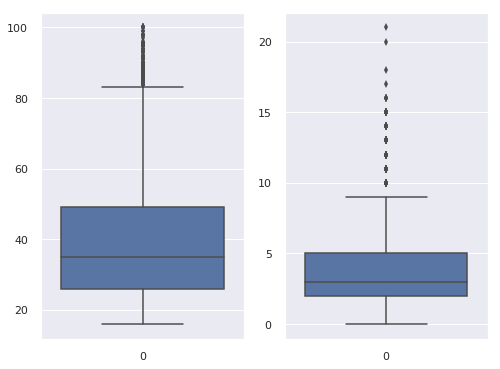

In [85]:
# using a boxplot to check for outliers in the numerical variables in the dataset

finfig, axx = plt.subplots(1,2, figsize=(8,6))
sns.boxplot(data=fin['respondent_age'], ax=axx[0])
sns.boxplot(data=fin['household_size'], ax=axx[1])
plt.show()

# the boxplots reveal that there exist outliers in the respondent_age and household_size columns. 
# However, the outliers can be considered to be reasonable in reality and therefore they won't be removed


In [86]:
# dropping columns year because it is not useful for this analysis

fin.drop(columns=['year', 'uniqueid'], inplace=True)
fin.columns

# year column is specific to each country / almost similar to id

Index(['country', 'has_bank_account', 'location', 'cellphone_access',
       'household_size', 'respondent_age', 'gender_of_respondent',
       'rltshp_with_head', 'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [87]:
# using pandas profiling to get a summarized report of the dataset

pp.ProfileReport(fin)

Number of variables,12
Number of observations,23343
Total Missing (%),0.0%
Total size in memory,2.1 MiB
Average record size in memory,96.0 B
Numeric,3
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
# profile report reveals that most of the respondents had cellphone access
# spearman and pearson correlation heatmaps also reveal a weak correlation between the numerical variables in the dataset

In [88]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 11 columns):
country                 23343 non-null object
has_bank_account        23343 non-null object
location                23343 non-null object
cellphone_access        23343 non-null object
household_size          23343 non-null float64
respondent_age          23343 non-null float64
gender_of_respondent    23343 non-null object
rltshp_with_head        23343 non-null object
marital_status          23343 non-null object
education_level         23343 non-null object
job_type                23343 non-null object
dtypes: float64(2), object(9)
memory usage: 2.8+ MB


## Univariate and Bivariate Analysis

### Frequency Tables

In [89]:
# frequency table for the has_bank_account column

fin['has_bank_account'].value_counts()



No     20046
Yes     3297
Name: has_bank_account, dtype: int64

In [90]:
# frequency table for country column
fin['country'].value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

In [91]:
# frequency table for cellphone_access column
fin['cellphone_access'].value_counts()

Yes    17334
No      6009
Name: cellphone_access, dtype: int64

### Univariate Analysis

#### Measures of Central Tendency

In [92]:
# printing the mean, mode and median of respondent_age and household size columns

mean_age = fin['respondent_age'].mean()
print('mean age: %.2f' % mean_age)

mean_hsehld_size = fin['household_size'].mean()
print('mean household size: %.2f' % mean_hsehld_size)

mode_age = fin['respondent_age'].mode()
print('mode respondent age: %.0f' % mode_age)

mode_hshld_size = fin['household_size'].mode()
print('mode household size: %d' % mode_hshld_size)

median_age = fin['respondent_age'].median()
print('median age of respondents: %d' % median_age)

median_hs_size = fin['household_size'].median()
print('median household size: %d' %median_hs_size)


mean age: 38.81
mean household size: 3.69
mode respondent age: 30
mode household size: 2
median age of respondents: 35
median household size: 3


#### Measures of Spread

In [93]:
# printing the measures of spread in respondent age column

# std
std_age = fin['respondent_age'].std()
print('Standard deviation in respondents\' age: {:.3f}' .format(std_age))

# variance
age_var = fin['respondent_age'].var()
print('Variance in respondents\' age: {:.3f}' .format(age_var))

# range of age

age_max = fin['respondent_age'].max()
age_min = fin['respondent_age'].min()

range_age = age_max - age_min
print('Range of respondents\' age: {}' .format(range_age))

# quartiles of age
quartiles = fin['respondent_age'].quantile([0.25,0.5,0.75])
print('first, second and third quartiles: \n{}'.format(quartiles))

# skewness
age_skew = fin['respondent_age'].skew()
print('Skewness in respondents\' age: {:.3f}' .format(age_skew))

# kurtosis
age_kurt = fin['respondent_age'].kurt()
print('Kurtosis in respondent age: {:.3f}'.format(age_kurt))


# according to the output, there is a high standard deviation & variance in respondents' age, meaning the ages are spread further from the mean
# range (i.e. difference between max oldest and youngest respondent) of respondents' age is 84 years
# skew() returns a positive value, implying the distribution of values in the column is skewed to the right
# the column has a kurtosis value that is close to zero, implying that it assumes a relatively normal distribution (i.e. is mesokurtic)
# normal distribution also implies few to no outliers

Standard deviation in respondents' age: 16.520
Variance in respondents' age: 272.904
Range of respondents' age: 84.0
first, second and third quartiles: 
0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64
Skewness in respondents' age: 0.841
Kurtosis in respondent age: 0.098


In [94]:
# printing the measures of spread for the household_size column

# std
std_hs_size = fin['household_size'].std()
print('Standard deviation in household size: {:.2f}' .format(std_hs_size))

# variance in year
hs_size_var = fin['household_size'].var()
print('Variance in household size: {:.2f}' .format(hs_size_var))

# range of year

hs_size_max = fin['household_size'].max()
hs_size_min = fin['household_size'].min()

range_hs_size = hs_size_max - hs_size_min
print('Range of household size: {}' .format(range_hs_size))

# quartiles of age
quartiles_hs_size = fin['household_size'].quantile([0.25,0.5,0.75])
print('first, second and third quartiles: \n{}'.format(quartiles_hs_size))

# skewness
hs_size_skew = fin['household_size'].skew()
print('Skewness in household size: {:.2f}' .format(hs_size_skew))

# kurtosis
year_kurt = fin['household_size'].kurt()
print('Kurtosis in household size: {:.2f}'.format(year_kurt))

# standard deviation and variance are relatively small, implying the values closely distributed around the mean 
# kurtosis is positive implying that the column has some outliers
# range of household column is 21 persons
# distribution of values is also skewed to the right



Standard deviation in household size: 2.28
Variance in household size: 5.20
Range of household size: 21.0
first, second and third quartiles: 
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64
Skewness in household size: 0.97
Kurtosis in household size: 1.15


#### Data Visualization

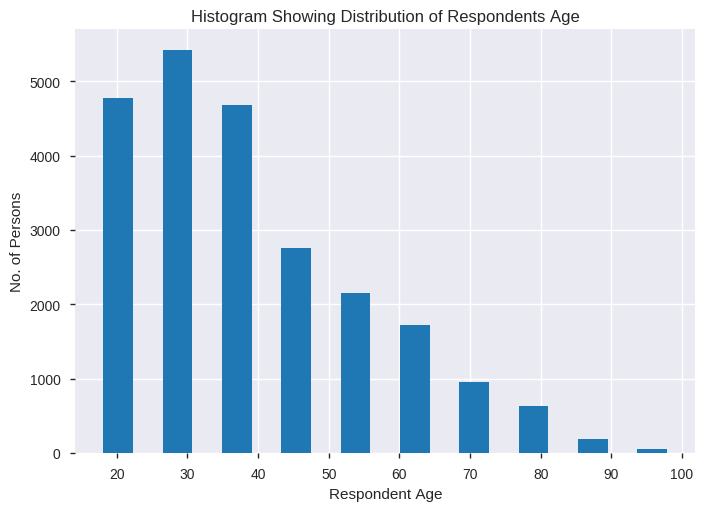

In [97]:
# plotting a histogram of the respondent age column using matplotlib

plt.hist(fin['respondent_age'], bins=10, histtype='bar', rwidth=0.5)
plt.xlabel('Respondent Age')
plt.ylabel('No. of Persons')
plt.title('Histogram Showing Distribution of Respondents Age')
plt.show()


# histogram reveals that most of the respondents were approximately between the ages of 20-40 years.

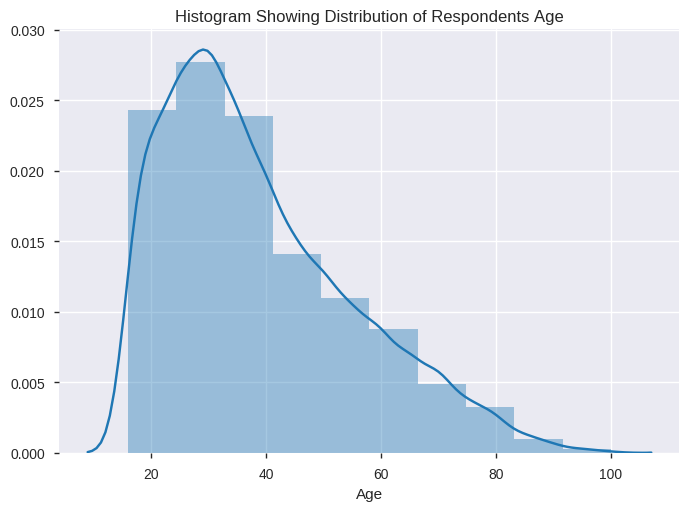

In [98]:
# plotting a histogram of respondent age column using seaborn

sns.distplot(fin['respondent_age'], bins=10, axlabel='Age')
plt.title('Histogram Showing Distribution of Respondents Age')
plt.show()

# the distribution of respondents age is skewed to the right
# according to histogram, most respondents are between the ages of 20-40 years

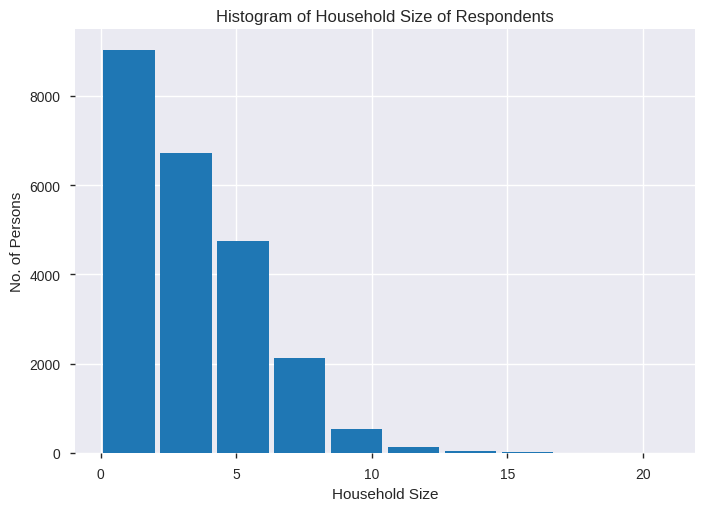

In [99]:
# plotting a histogram showing distribution of household size of respondents using matplotlib

plt.hist(fin['household_size'], bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Household Size')
plt.ylabel('No. of Persons')
plt.title('Histogram of Household Size of Respondents')
plt.show()

# most of the respondents had household sizes ranging between 1-5 persons

In [100]:
# comparing value counts of different house sizes with histogram
fin['household_size'].value_counts()

2.0     5072
1.0     3928
3.0     3514
4.0     3200
5.0     2716
6.0     2029
7.0     1378
8.0      740
9.0      354
10.0     191
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

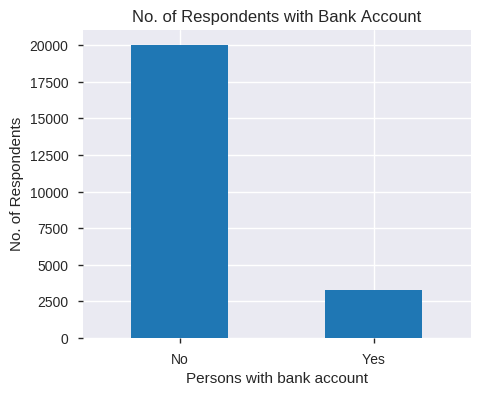

In [101]:
# using a bar graph to check proportion of respondents with bank account 

fin['has_bank_account'].value_counts().plot.bar(figsize=(5,4))
plt.xticks(rotation=360)
plt.xlabel('Persons with bank account')
plt.ylabel('No. of Respondents')
plt.title('No. of Respondents with Bank Account')
plt.show()

# a great proportion of respondents (approx. 20,000) did not have a bank account
# roughly 2700 of respondents had bank accounts

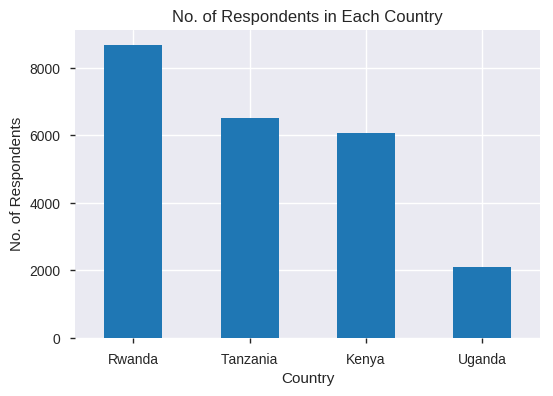

In [102]:
# checking the proportion of respondents from each country using a bar graph

fin['country'].value_counts().plot.bar(figsize=(6,4))
plt.xticks(rotation=360)
plt.xlabel('Country')
plt.ylabel('No. of Respondents')
plt.title('No. of Respondents in Each Country')
plt.show()

# most of respondents were from Rwanda, followed by Tanzania, Kenya and Uganda respectively
# about 8500 respondents were from Rwanda, 6,200 from Tanzania, 6,000 from Kenya and 2000 from Uganda

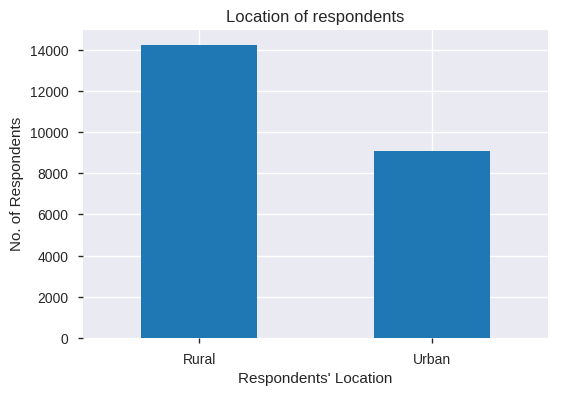

In [103]:
# using a bar grapgh to display location (whether urban or rural) of respondents of dataset

fin['location'].value_counts().plot.bar(figsize=(6,4))
plt.xticks(rotation=360)
plt.xlabel('Respondents\' Location')
plt.ylabel('No. of Respondents')
plt.title('Location of respondents')
plt.show()

# most of the respondents (about 14,000) were located in rural areas, 
# in comparison, 9,000 respondents were located in urban areas


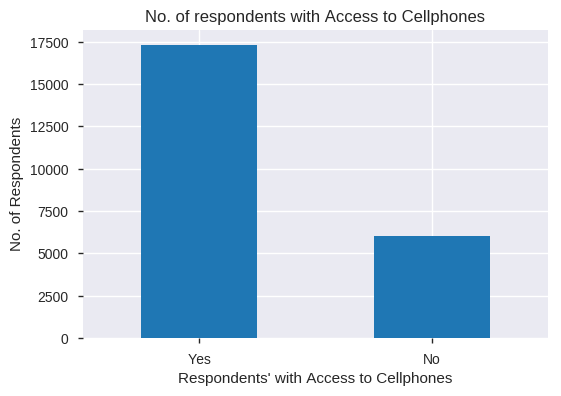

In [104]:
# displaying no of respondents' with cell phone access on a bar graph

fin['cellphone_access'].value_counts().plot.bar(figsize=(6, 4))
plt.xticks(rotation=360)
plt.xlabel('Respondents\' with Access to Cellphones')
plt.ylabel('No. of Respondents')
plt.title('No. of respondents with Access to Cellphones')
plt.show()

# most of the respondents (about 17,500 respondents) had access to cell phones
# only 6000 respondents lacked access to cellphones


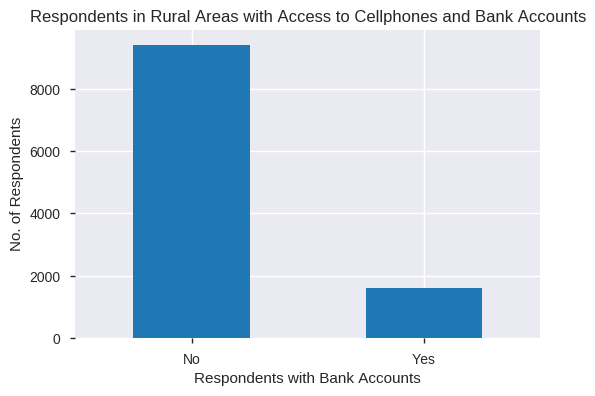

In [105]:
# using a bar graph to compare persons with bank accounts and are located in rural areas and have access to cell phones

fin_sel = fin[(fin['location'] == 'Rural') & (fin['cellphone_access'] == 'Yes')]

fin_sel['has_bank_account'].value_counts().plot.bar(figsize=(6,4))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Respondents in Rural Areas with Access to Cellphones and Bank Accounts')
plt.show()

# most respondents (about 9,200) located in rural areas with access to cell phones did not have a bank account

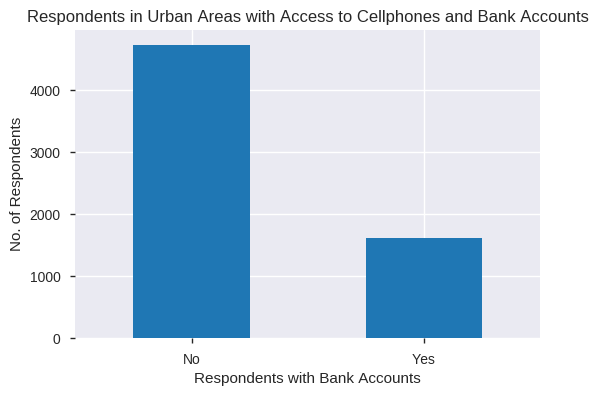

In [106]:
# using a bar graph to compare persons with bank accounts and located in urban areas and have access to cellphones

fin_sl = fin[(fin['location'] == 'Urban') & (fin['cellphone_access'] == 'Yes')]

fin_sl['has_bank_account'].value_counts().plot.bar(figsize=(6,4))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Respondents in Urban Areas with Access to Cellphones and Bank Accounts')
plt.show()

# most respondents(about 4,700 respondents) situated in urban areas with access to cell phones lacked a bank account

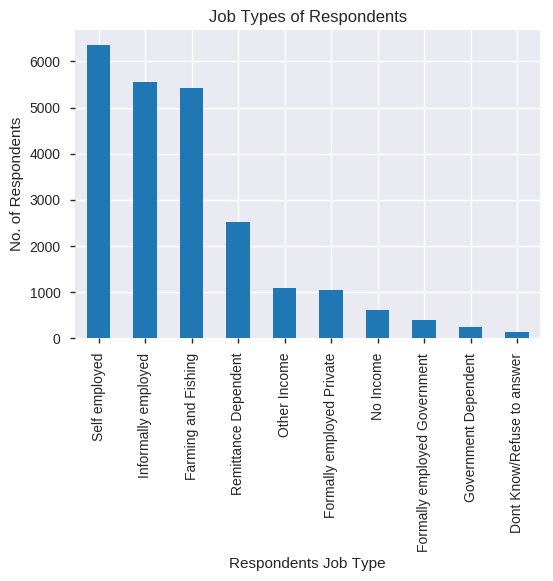

In [107]:
# checking the distribution of job types of respondents

fin.job_type.value_counts().plot.bar(figsize=(6,4))

plt.xlabel('Respondents Job Type')
plt.ylabel('No. of Respondents')
plt.title('Job Types of Respondents')
plt.show()

# most of the respondents were self employed, informally employed, 
# or into farming and fishing

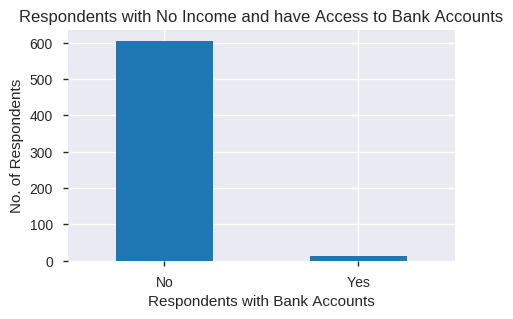

In [108]:
# comparing persons with bank accounts and have their job type is no income

fins = fin[fin['job_type'] == 'No Income']

fins['has_bank_account'].value_counts().plot.bar(figsize=(5,3))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Respondents with No Income and have Access to Bank Accounts')
plt.show()

# most respondents with no source of income lacked a bank account
# less than 50 respondents with no income had bank accounts

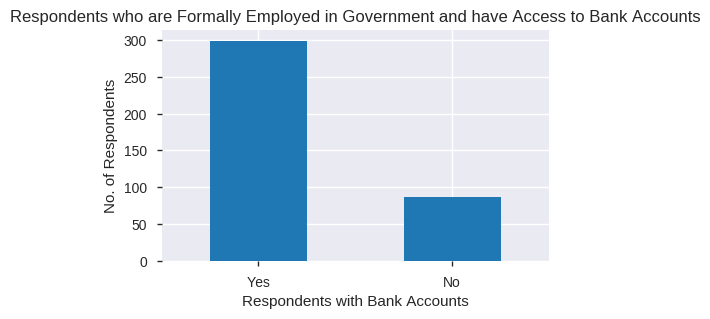

In [109]:
# comparing persons with bank accounts and are formally employed in government

fns = fin[fin['job_type'] == 'Formally employed Government']

fns['has_bank_account'].value_counts().plot.bar(figsize=(5,3))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Respondents who are Formally Employed in Government and have Access to Bank Accounts')
plt.show()

# most of the respondents who are formally employed in the government had bank accounts

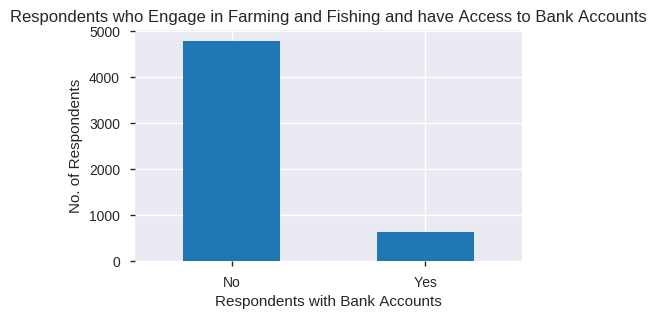

In [110]:
# comparing persons with bank accounts and their job type is farming and fishing

fis = fin[fin['job_type'] == 'Farming and Fishing']

fis['has_bank_account'].value_counts().plot.bar(figsize=(5,3))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Respondents who Engage in Farming and Fishing and have Access to Bank Accounts')
plt.show()

# most of the respondents (roughly 4,800 respondents) who engage in farming and fishing had no bank accounts

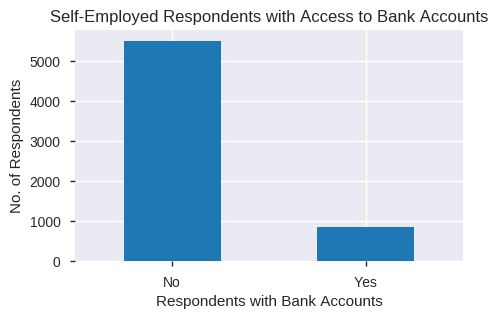

In [111]:
# using a bar graph to compare persons with bank accounts and their job type is farming and fishing

f_self = fin[fin['job_type'] == 'Self employed']


f_self['has_bank_account'].value_counts().plot.bar(figsize=(5,3))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Self-Employed Respondents with Access to Bank Accounts')
plt.show()

# most of the respondents who were self-employed had no bank accounts

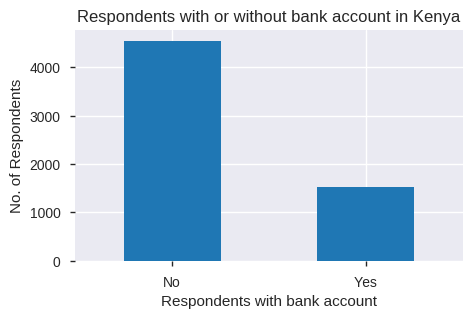

In [112]:
# bar graph displaying respondents in Kenya with/without bank account

ken = fin[fin['country'] == 'Kenya']
ken['has_bank_account'].value_counts().plot.bar(figsize=(5,3))
plt.xlabel('Respondents with bank account')
plt.xticks(rotation=360)
plt.ylabel('No. of Respondents')
plt.title('Respondents with or without bank account in Kenya')
plt.show()


# about 4500 respondents from Kenya did not have a bank account
# about 1500 respondents from Kenya had a bank account

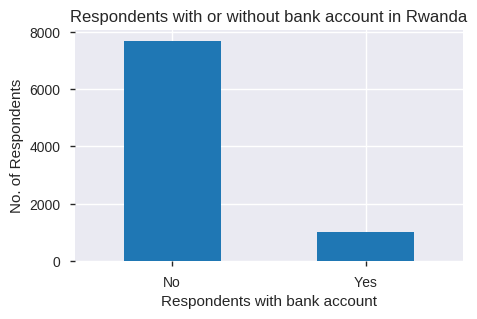

In [113]:
# bar graph displaying proportion of respondents in Rwanda with bank account

rwanda = fin[fin['country'] == 'Rwanda']
rwanda['has_bank_account'].value_counts().plot.bar(figsize=(5,3))
plt.xlabel('Respondents with bank account')
plt.xticks(rotation=360)
plt.ylabel('No. of Respondents')
plt.title('Respondents with or without bank account in Rwanda')
plt.show()


# approximately 1000 of the respondents from rwanda had bank accounts
# approx. 7,700 of the respondents from rwanda lacked bank accounts


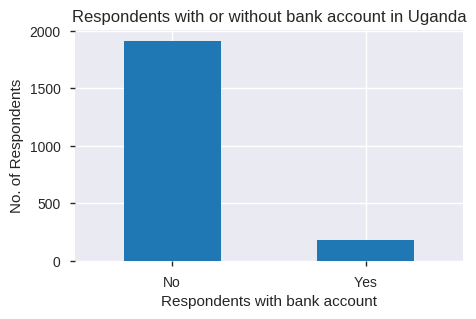

In [114]:
#  respondents in Uganda with bank account

uganda = fin[fin['country'] == 'Uganda']
uganda['has_bank_account'].value_counts().plot.bar(figsize=(5,3))
plt.xlabel('Respondents with bank account')
plt.xticks(rotation=360)
plt.ylabel('No. of Respondents')
plt.title('Respondents with or without bank account in Uganda')
plt.show()


# about 1900 of the respondents from Uganda lacked banks accounts 
# approx. 150 of the respondents from Uganda had bank accounts

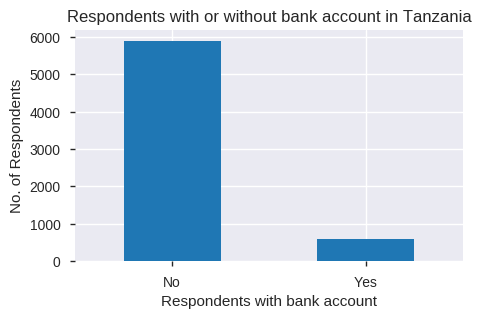

In [115]:
#  respondents in Tanzania with bank account

tan = fin[fin['country'] == 'Tanzania']
tan['has_bank_account'].value_counts().plot.bar(figsize=(5,3))
plt.xlabel('Respondents with bank account')
plt.xticks(rotation=360)
plt.ylabel('No. of Respondents')
plt.title('Respondents with or without bank account in Tanzania')
plt.show()


# approx 5,900 of respondents from tanzania lacked bank accounts
# approx 600 of respondents from Tanzania had bank accounts

In [0]:
# univariate analysis summary and recommendations 

# most of the respondents did not have bank accounts and were situated in rural locations
# most of the respondents had access to cellphones
# bar graphs make up a great part of the univariate analysis because they are suitable for categorical data.
# seaborn histograms (distplots) are more suitable as they also show the distribution of data

### Bivariate Analysis

In [117]:
# checking the descriptive statistics for the numerical variables only

fin.describe()

,household_size,respondent_age
count,23343.000000,23343.000000
mean,3.688643,38.805509
std,2.281184,16.519803
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


#### Correlation

In [118]:
# checking for the pearson correlation between the variables household size and respondent age using corr()
fin['household_size'].corr(fin['respondent_age'], method='pearson')

# the correlation between the two variables (respondent age & household size) is a negative weak correlation

-0.11970919507762415

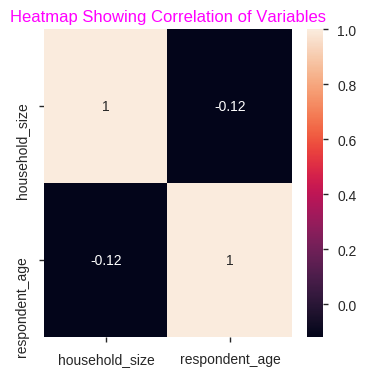

In [119]:
# checking for correlation of variables using seaborn's heatmap

heatmap = fin.corr()
plt.figure(figsize=(4,4))
sns.heatmap(heatmap, xticklabels = heatmap.columns, yticklabels=heatmap.columns, annot=True)
plt.title('Heatmap Showing Correlation of Variables', color = "magenta")


plt.show()
# heatmap shows variables have a negative weak correlation

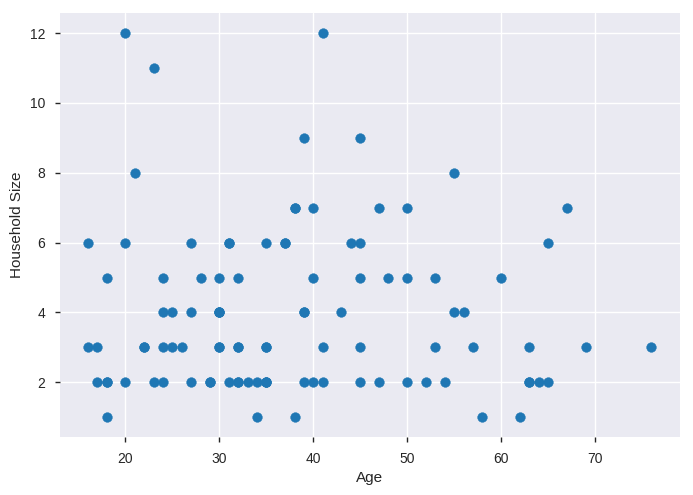

In [120]:
# using a scatter plot to check for correlation between household size and respondent age

fn = fin.sample(100)
plt.scatter(fn['respondent_age'], fn['household_size'])
plt.plot(figsize=(4,3))
plt.xlabel('Age')
plt.ylabel('Household Size')
plt.show()

# points are scattered all over, we can conclude that the two variables have no correlation

In [0]:
# bivariate analysis summary and recommendations

# since most of the columns are categorical, there's not much bivariate analysis that can be done
# bivariate analysis (using heatmap) reveals that the numerical columns have a negative weak correlation
# consequently, no variable can act as a substitute for another
# one can get the correlation of variables using a scatter plot, heatmap or corr() method

## Modelling

### Multivariate Analysis and Preprocessing

In [0]:
# creating the features and labels for the model

X = fin.drop(['has_bank_account'], 1)
y = fin['has_bank_account']

# has bank account column is selected as the target/label (i.e. y) for the model,
# it contains two unique values, 'yes' and 'no'
# the features for the model (i.e. X) are all the columns excluding of the has_bank_account column

In [154]:
# previewing X
X.head()

,country,location,cellphone_access,household_size,respondent_age,gender_of_respondent,rltshp_with_head,marital_status,education_level,job_type
0,Kenya,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [155]:
# converting the categorical columns in the features to numerical variables using get_dummies()

fin_ml = pd.get_dummies(X)
fin_ml.head()

,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_Rural,location_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,rltshp_with_head_Child,rltshp_with_head_Head of Household,rltshp_with_head_Other non-relatives,rltshp_with_head_Other relative,rltshp_with_head_Parent,rltshp_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [124]:
# checking the datatypes and number of variables 
fin_ml.info()

# resulting dataframe has 40 integer columns and 23,343 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 40 columns):
household_size                                     23343 non-null float64
respondent_age                                     23343 non-null float64
country_Kenya                                      23343 non-null uint8
country_Rwanda                                     23343 non-null uint8
country_Tanzania                                   23343 non-null uint8
country_Uganda                                     23343 non-null uint8
location_Rural                                     23343 non-null uint8
location_Urban                                     23343 non-null uint8
cellphone_access_No                                23343 non-null uint8
cellphone_access_Yes                               23343 non-null uint8
gender_of_respondent_Female                        23343 non-null uint8
gender_of_respondent_Male                          23343 non-null uint8
rltshp_with_head_Child 

In [0]:
# since linear regression models work with numbers only, we have to convert the y/label to numerical columns
# we use labelencoder() to convert categorical values to numerical values of 0s and 1s.
label_encoder = LabelEncoder()

y_reg = label_encoder.fit_transform(y)

In [0]:
# splitting dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(fin_ml, y_reg, test_size=0.2, random_state=100)

#### Fitting Linear Regression Model 

In [127]:
# we create and train the model by fitting on the training data.
#

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
# predicting using the linear regression model

predicted_y = reg.predict(X_test)
predicted_y

array([ 0.02479051,  0.08221291, -0.00311518, ...,  0.26066912,
        0.07312292,  0.16856145])

In [129]:
r2_score(y_test, predicted_y)

# output indicates that a linear model explains only 25.15% percent of response data variability 
# therefore, linear regression model is not a good fit

0.25149527017506235

In [130]:
# Previewing the coefficients and the y intercept of the linear model

(reg.coef_, reg.intercept_)

(array([-0.00150166,  0.00129125,  0.08581485,  0.03929184, -0.05104245,
        -0.07406425, -0.02079788,  0.02079788, -0.03739138,  0.03739138,
        -0.02029249,  0.02029249, -0.01858189,  0.05094038, -0.04456514,
        -0.02687488, -0.00429689,  0.04337843, -0.02375249,  0.05378106,
         0.00439944, -0.02003654, -0.01439146, -0.05014177, -0.21830005,
         0.14967075, -0.17167971, -0.05616458,  0.17562753,  0.17098783,
        -0.03113668, -0.10802849,  0.30178956,  0.18504449,  0.00949008,
        -0.11832672, -0.06848701, -0.01398679, -0.1211963 , -0.03516214]),
 0.23819931618038478)

In [0]:
# multivariate analysis reveals that a linear regression model is not a good fit for the dataset in question
# linear regression also revealed that most of the variables are not correlated 
# one recommendation would be to attempt multivariate analysis using Kmeans as the ML model. 

#### Normalization

In [0]:
# splitting dataset into training and test sets

Xc_train, Xc_test, yc_train, yc_test = train_test_split(fin_ml, y, test_size=0.2, random_state=100)

In [0]:
# applying normalization on the features using standard scaler normalization
# normalization ensures no single variable exhibits much greater variance than the other

sc = StandardScaler()
Xc_train = sc.fit_transform(Xc_train)
Xc_test = sc.transform(Xc_test)

### Dimensionality Reduction Using PCA

In [0]:
# dimesionality reduction by applying pca on the features 

pca = PCA()

Xc_train = pca.fit_transform(X_train)
Xc_test = pca.transform(X_test)

In [142]:
# checking the explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.65724094e-01, 1.87404539e-02, 2.30872372e-03, 2.27763853e-03,
       1.40759182e-03, 1.34370260e-03, 1.15585535e-03, 9.17286053e-04,
       8.95650144e-04, 7.96555507e-04, 7.31248146e-04, 5.30782089e-04,
       4.58664212e-04, 3.93946073e-04, 3.58658446e-04, 3.43972750e-04,
       2.47098998e-04, 2.23604417e-04, 2.09772533e-04, 1.59676697e-04,
       1.56493688e-04, 1.36920741e-04, 1.23977206e-04, 1.11749547e-04,
       9.27836241e-05, 5.59195242e-05, 3.70156938e-05, 3.28289018e-05,
       2.00991635e-05, 5.20355750e-06, 1.09031117e-06, 9.41844888e-07,
       1.90455496e-31, 9.09043303e-33, 9.09043303e-33, 9.09043303e-33,
       9.09043303e-33, 9.09043303e-33, 9.09043303e-33, 9.09043303e-33])

In [0]:
# checking results with 36 principal components 

pca = PCA(n_components=36)
Xc_train = pca.fit_transform(Xc_train)
Xc_test = pca.transform(Xc_test)

### Creating A Model using RandomForest Classifier

In [136]:
# training and making predictions using RandomForestClassifier as the ML model
# random forest is used because it less affected by outliers

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(Xc_train, yc_train)

# predicting the label

pred_y = classifier.predict(Xc_test)
pred_y

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

#### Performance Evaluation of Model

In [137]:
# performance evaluation of model 

cmatrix = confusion_matrix(yc_test, pred_y)
print(cmatrix)
print('Accuracy is: {}' .format(accuracy_score(yc_test, pred_y)))
print('\nPercentage Accuracy with PCA is: {}%' .format(accuracy_score(yc_test, pred_y) * 100))

# the output indicates that with 36 principal components, 
# the randomforest classifier predicted persons likely to own a bank account with 86.121% accuracy while using pca for dimensionality reduction

[[3997    6]
 [ 642   24]]
Accuracy is: 0.8612122510173484

Percentage Accuracy with PCA is: 86.12122510173485%


In [0]:
# evaluating results with 24 principal components 

pca = PCA(n_components=24)
Xc_train = pca.fit_transform(Xc_train)
Xc_test = pca.transform(Xc_test)

In [147]:
# training and making predictions using RandomForestClassifier as the ML model
# random forest is used because it less affected by outliers

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(Xc_train, yc_train)

# predicting the label

pred_y = rfc.predict(Xc_test)
pred_y

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [148]:
# performance evaluation of model 

ctrix = confusion_matrix(yc_test, pred_y)
print(ctrix)
print('Accuracy is: {}' .format(accuracy_score(yc_test, pred_y)))
print('\nPercentage Accuracy with PCA is: {}%' .format(accuracy_score(yc_test, pred_y) * 100))

# the output indicates that with 24 principal components, 
# the randomforest classifier predicted persons likely to own a bank account with 86.485% accuracy while using pca for dimensionality reduction

[[3996    7]
 [ 624   42]]
Accuracy is: 0.8648532876418933

Percentage Accuracy with PCA is: 86.48532876418933%


In [0]:
# evaluating results with 16 principal components 

pca = PCA(n_components=16)
Xc_train = pca.fit_transform(Xc_train)
Xc_test = pca.transform(Xc_test)

In [151]:
# training and making predictions using RandomForestClassifier as the ML model
# random forest is used because it less affected by outliers

rfclass = RandomForestClassifier(max_depth=2, random_state=0)
rfclass.fit(Xc_train, yc_train)

# predicting the label

predd_y = rfclass.predict(Xc_test)
predd_y

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [152]:
# performance evaluation of model 

contrix = confusion_matrix(yc_test, pred_y)
print(contrix)
print('Accuracy is: {}' .format(accuracy_score(yc_test, predd_y)))
print('\nPercentage Accuracy with PCA is: {}%' .format(accuracy_score(yc_test, predd_y) * 100))

# the output indicates that with 24 principal components, 
# the randomforest classifier predicted persons likely to own a bank account with 86.485% accuracy while using pca for dimensionality reduction

[[3996    7]
 [ 624   42]]
Accuracy is: 0.8573570357678304

Percentage Accuracy with PCA is: 85.73570357678304%


In [0]:
# from the performance evaluation, 24 components yielded the highest accuracy (86.48%)
# we can therefore use 24 components for our model


### Dimensionality Reduction using LDA

In [163]:
# LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 

lda = LDA()
Xc_train = lda.fit_transform(Xc_train, yc_train)
Xc_test = lda.transform(Xc_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [166]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a LDA-reduced algorithm as shown
# 

rf_classifier = RandomForestClassifier(max_depth=2, random_state=10)
rf_classifier.fit(Xc_train, yc_train)

# making predictions with model 

y_pred = rf_classifier.predict(Xc_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [167]:
# evaluating performance of model using while lda for dimensionality reduction

conMat = confusion_matrix(yc_test, y_pred)
print(conMat)
print('Accuracy: ' + str(accuracy_score(yc_test, y_pred)))
print('Percentage Accuracy with PCA is: {}%' .format(accuracy_score(yc_test, y_pred) * 100))

# lda exhibits slightly improved accuracy than pca, accuracy with lda is 88.28%


[[3948   55]
 [ 492  174]]
Accuracy: 0.8828442921396444
Percentage Accuracy with PCA is: 88.28442921396444%


**Conclusion **

Using random Forest as the machine learning model and PCA for dimeanisonality reduction, we can correctly predict individuals with or without bank accounts with an accuracy of 86.4%.

When using LDA in place of PCA, and maintaining the random forest classifier, the accuracy of prediction increases to 88.28%

Multivariate analysis revealed that a linear regression model is not best suited for the data to be worked on.

Outliers in the dataset were not dropped because they seemed reasonable.

